In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')
df = pd.DataFrame(data)

def preprocess_text(text):
    if pd.isnull(text):
        return ''

    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to clean the 'Review' column in the DataFrame
df['Review'] = df['Review'].apply(preprocess_text)

print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                 Review Rating
0     ambience good food quite good saturday lunch c...      5
1     ambience good pleasant evening service prompt ...      5
2     must try great food great ambience thnx servic...      5
3     soumen da arun great guy behavior sincerety go...      5
4     food goodwe ordered kodi drumstick basket mutt...      5
...                                                 ...    ...
9995  madhumathi mahajan well start nice courteous s...      3
9996  place never disappointed u food courteous staf...    4.5
9997  bad rating mainly chicken bone found veg food ...    1.5
9998  personally love prefer chinese food couple tim...      4
9999  checked try delicious chinese food seen nonveg...    3.5

[10000 rows x 2 columns]


In [5]:
from gensim import models
from gensim import corpora

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9955 non-null   object
 1   Rating  9962 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB
None

First few rows of the dataset:
                                              Review Rating
0  The ambience was good, food was quite good . h...      5
1  Ambience is too good for a pleasant evening. S...      5
2  A must try.. great food great ambience. Thnx f...      5
3  Soumen das and Arun was a great guy. Only beca...      5
4  Food is good.we ordered Kodi drumsticks and ba...      5

Summary statistics of numerical columns:
       Review Rating
count    9955   9962
unique   9363     10
top      good      5
freq      237   3832

Missing values:
Review    45
Rating    38
dtype: int64


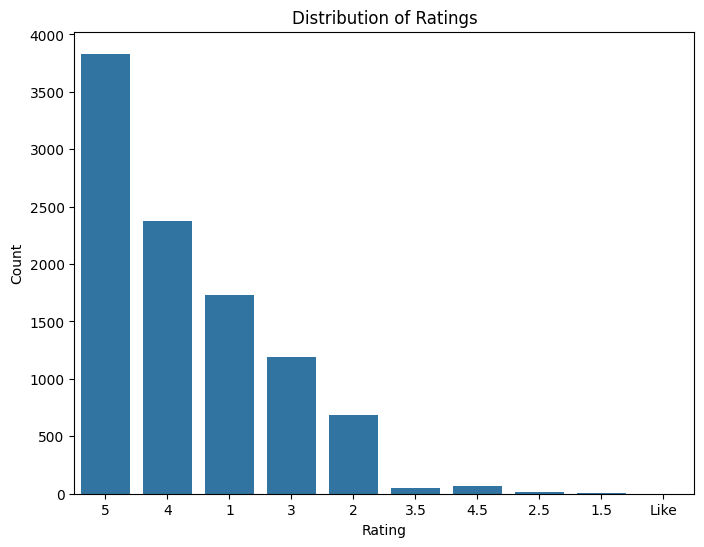

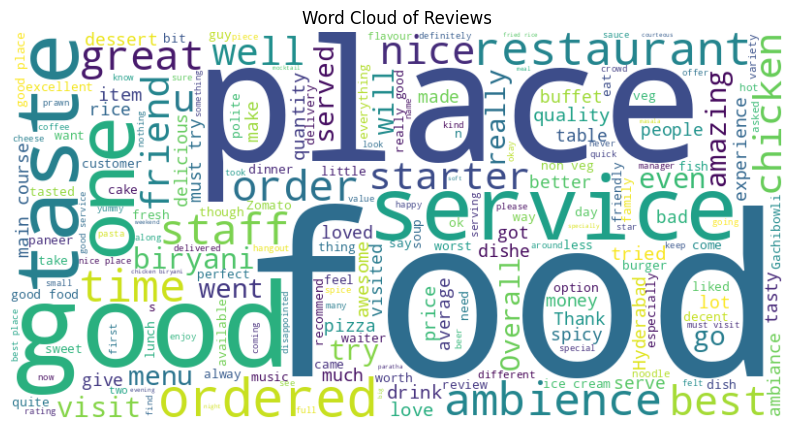

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Create a word cloud of the reviews
reviews_text = ' '.join(data['Review'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [7]:
from textblob import TextBlob

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Define a function to get sentiment polarity using TextBlob
# TextBlob  is lib use for part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation
def get_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return 0  # Return 0 polarity for non-string values

# Apply the function to the 'Review' column to get sentiment polarity for each review
data['Sentiment'] = data['Review'].apply(get_sentiment)

# Define a function to map sentiment polarity to sentiment labels
# polarity indicates whether the sentiment expressed in the text is positive, negative, or neutral.
def map_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Map sentiment polarity to sentiment labels
data['Sentiment_Label'] = data['Sentiment'].apply(map_sentiment)

# Display the first few rows of the dataset with sentiment labels
print(data[['Review', 'Sentiment', 'Sentiment_Label']].head())

                                              Review  Sentiment  \
0  The ambience was good, food was quite good . h...   0.660000   
1  Ambience is too good for a pleasant evening. S...   0.606667   
2  A must try.. great food great ambience. Thnx f...   0.540000   
3  Soumen das and Arun was a great guy. Only beca...   0.500000   
4  Food is good.we ordered Kodi drumsticks and ba...   0.577500   

  Sentiment_Label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


In [8]:
from gensim import corpora, models
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')


# Tokenize and preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return tokens
    else:
        return []

data['Processed_Text'] = data['Review'].apply(preprocess_text)


# Create a dictionary and corpus for the LDA model
dictionary = corpora.Dictionary(data['Processed_Text'])
corpus = [dictionary.doc2bow(text) for text in data['Processed_Text']]

# Apply LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and their top words
print("Topics and their top words:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

# Assign topics to reviews
data['Topic'] = data['Processed_Text'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x))[0][0])

# Display the first few rows of the dataset with assigned topics
print(data[['Review', 'Topic']].head())


Topics and their top words:
Topic: 0
Words: 0.024*"paneer" + 0.020*"ordered" + 0.017*"food" + 0.013*"good" + 0.013*"veg" + 0.013*"taste" + 0.011*"butter" + 0.010*"indian" + 0.009*"masala" + 0.009*"north"

Topic: 1
Words: 0.047*"place" + 0.033*"food" + 0.033*"good" + 0.017*"ambience" + 0.016*"service" + 0.014*"great" + 0.010*"best" + 0.010*"staff" + 0.009*"visit" + 0.008*"really"

Topic: 2
Words: 0.103*"good" + 0.047*"food" + 0.029*"service" + 0.021*"nice" + 0.021*"taste" + 0.017*"quantity" + 0.017*"time" + 0.016*"great" + 0.014*"biryani" + 0.014*"awesome"

Topic: 3
Words: 0.023*"food" + 0.016*"order" + 0.012*"restaurant" + 0.011*"bad" + 0.010*"even" + 0.010*"ordered" + 0.010*"service" + 0.009*"worst" + 0.008*"time" + 0.008*"one"

Topic: 4
Words: 0.034*"chicken" + 0.013*"ordered" + 0.011*"taste" + 0.008*"rice" + 0.008*"like" + 0.007*"one" + 0.007*"fried" + 0.007*"biryani" + 0.007*"try" + 0.006*"good"

                                              Review  Topic
0  The ambience was good, 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Preprocess the text data (tokenization and removing stopwords)
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

data['Processed_Text'] = data['Review'].apply(preprocess_text)

data['Processed_Text'] = data['Review'].apply(preprocess_text)

# Drop rows with NaN values
data = data.dropna(subset=['Processed_Text', 'Rating'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Text'], data['Rating'], test_size=0.2, random_state=42)

# Vectorize the text data using Bag-of-Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

# Predict the ratings for the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6081284495735073

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.86      0.77       345
         1.5       0.00      0.00      0.00         2
           2       0.50      0.01      0.02       129
         2.5       0.00      0.00      0.00         5
           3       0.45      0.16      0.24       252
         3.5       0.00      0.00      0.00         5
           4       0.44      0.56      0.49       486
         4.5       0.00      0.00      0.00        10
           5       0.70      0.80      0.75       758
        Like       0.00      0.00      0.00         1

    accuracy                           0.61      1993
   macro avg       0.28      0.24      0.23      1993
weighted avg       0.58      0.61      0.57      1993



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


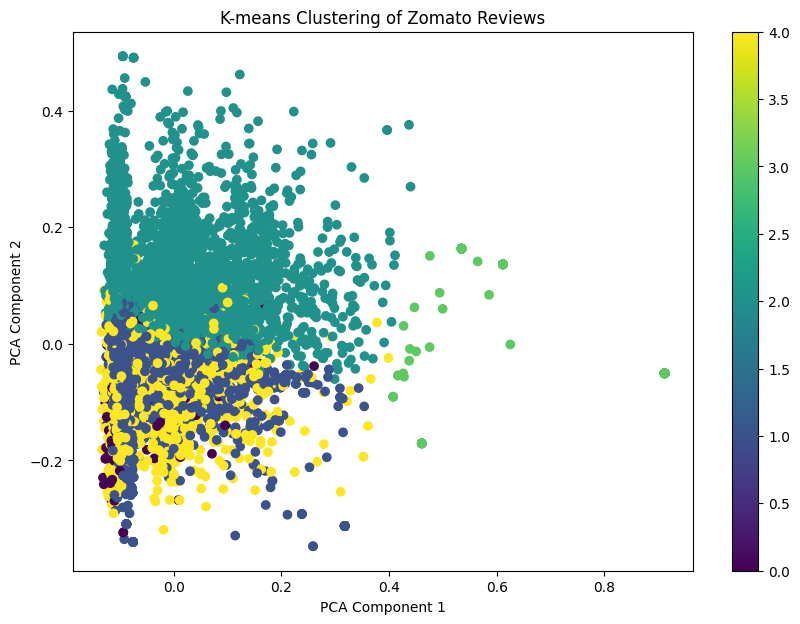

In [10]:
#kmeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Tokenize and preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

data['Processed_Text'] = data['Review'].apply(preprocess_text)

# Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Processed_Text'])

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering of Zomato Reviews')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


Accuracy: 0.6151530356246864
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.84      0.75       345
         1.5       0.00      0.00      0.00         2
           2       0.42      0.12      0.18       129
         2.5       0.00      0.00      0.00         5
           3       0.47      0.27      0.34       252
         3.5       0.00      0.00      0.00         5
           4       0.48      0.48      0.48       486
         4.5       0.00      0.00      0.00        10
           5       0.69      0.82      0.75       758
        Like       0.00      0.00      0.00         1

    accuracy                           0.62      1993
   macro avg       0.27      0.25      0.25      1993
weighted avg       0.58      0.62      0.59      1993



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


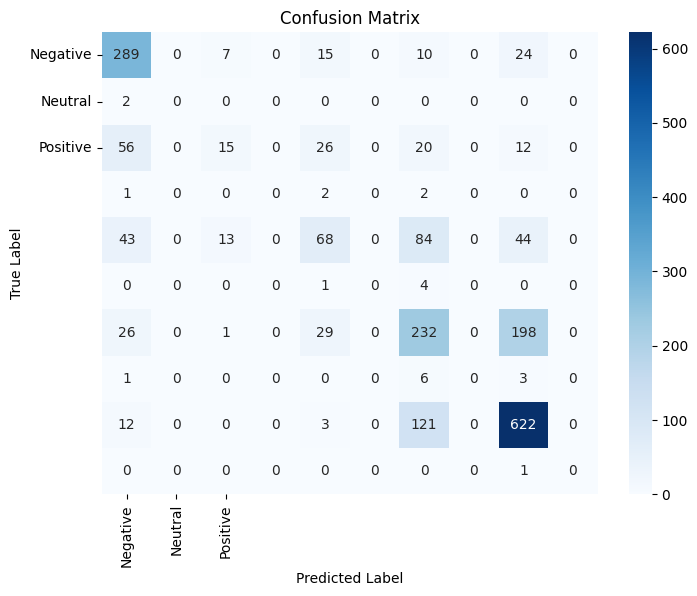

In [11]:
#dsm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Preprocess the text data
data['Processed_Text'] = data['Review'].apply(preprocess_text)

# Remove rows with NaN values
data.dropna(subset=['Processed_Text', 'Rating'], inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Text'], data['Rating'], test_size=0.2, random_state=42)

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [12]:
pip install pyldavis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.4 MB/s eta 0:00:00


In [13]:
from gensim import corpora, models
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Tokenize and preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        return tokens
    else:
        return []

data['Processed_Text'] = data['Review'].apply(preprocess_text)




In [14]:
#Feature Engineering

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Define functions for text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    if pd.isnull(text):
        return ''

    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Joining tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply text preprocessing to the 'Review' column
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Create new features based on the processed text
data['Review_Length'] = data['Processed_Review'].apply(len)
data['Word_Count'] = data['Processed_Review'].apply(lambda x: len(x.split()))

# Display the first few rows of the dataset with the new features
print(data[['Processed_Review', 'Review_Length', 'Word_Count', 'Rating']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                    Processed_Review  Review_Length  \
0  ambience good food quite good saturday lunch c...            153   
1  ambience good pleasant evening service prompt ...             95   
2  must try great food great ambience thnx servic...            137   
3  soumen da arun great guy behavior sincerety go...             83   
4  food goodwe ordered kodi drumstick basket mutt...            115   

   Word_Count Rating  
0          24      5  
1          14      5  
2          19      5  
3          14      5  
4          17      5  


In [15]:
#Data Visualization:

!pip install matplotlib


In [16]:
!pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


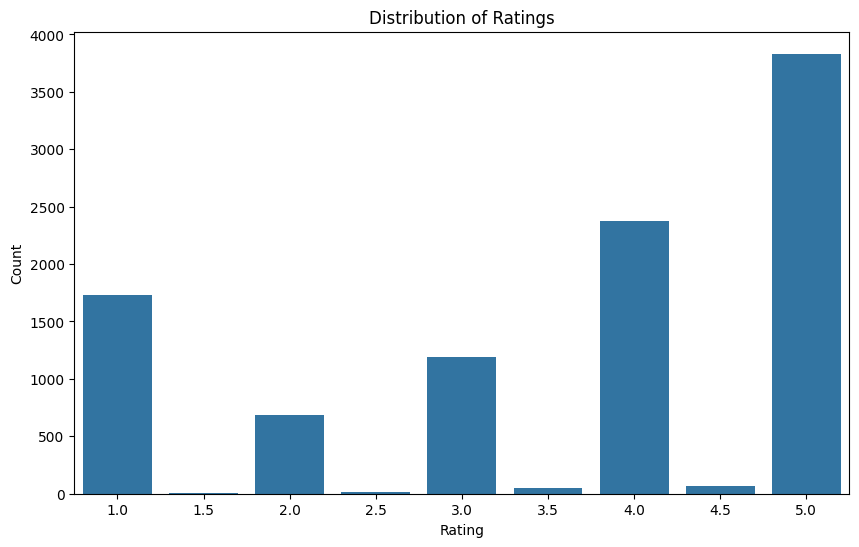

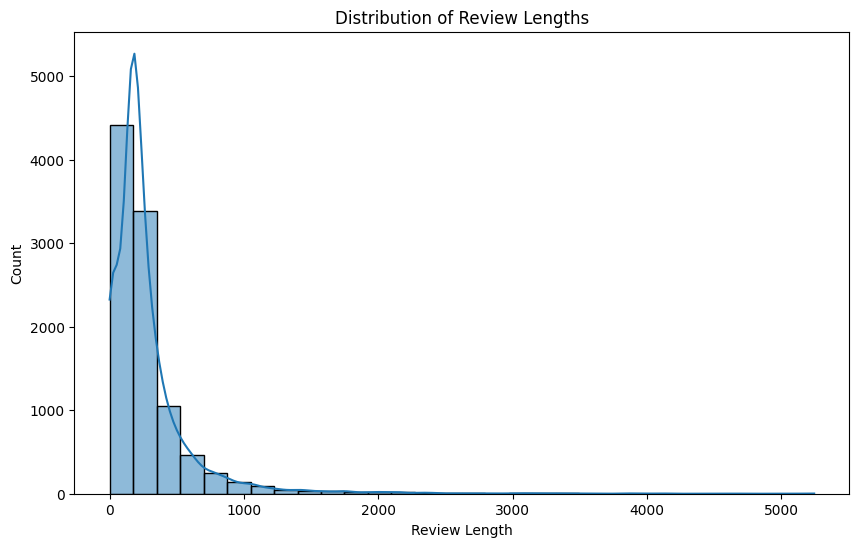

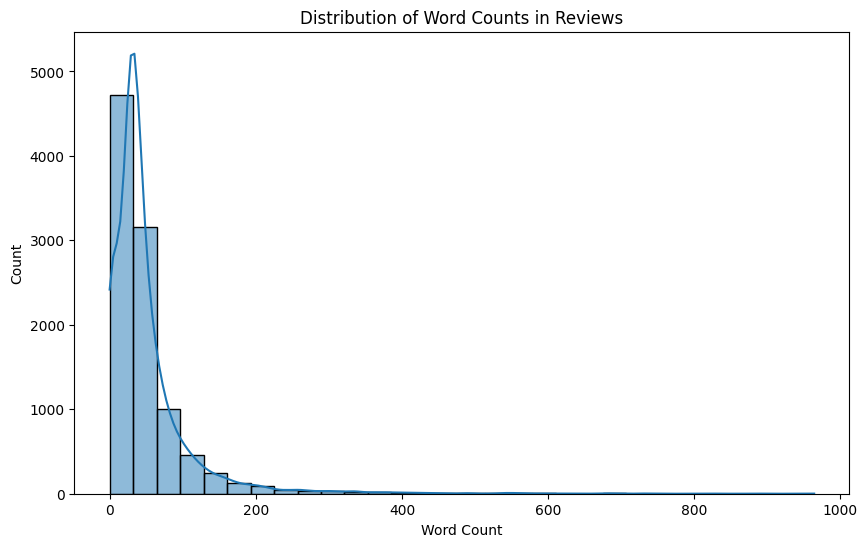

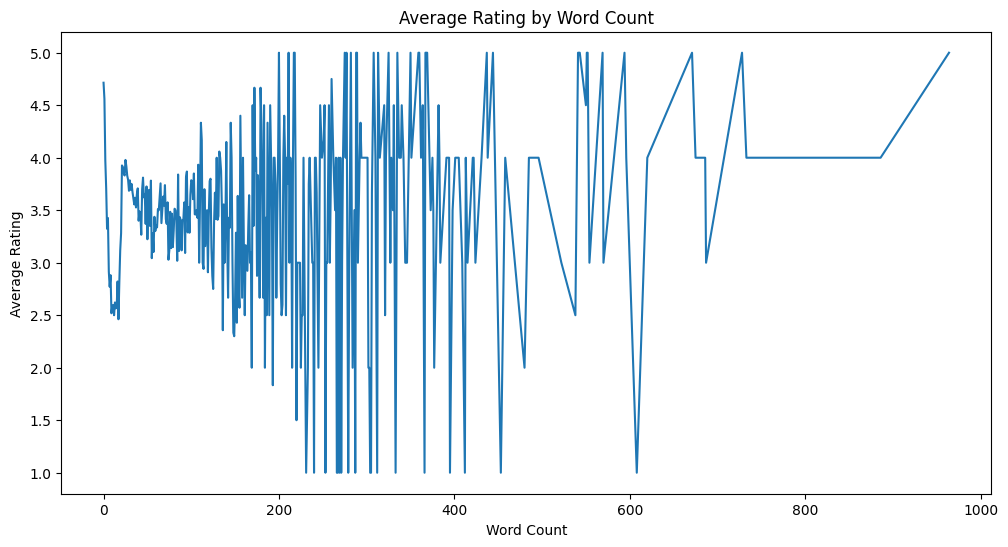

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/Zomato Restaurant reviews(dataset).csv", encoding='latin-1')

# Replace NaN values in 'Review' column with empty strings
data['Review'] = data['Review'].fillna('')

# Convert 'Rating' column to numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot distribution of review lengths
data['Review_Length'] = data['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['Review_Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

# Plot distribution of word counts in reviews
data['Word_Count'] = data['Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['Word_Count'], bins=30, kde=True)
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

# Plot average rating by word count
avg_rating_by_word_count = data.groupby('Word_Count')['Rating'].mean()
plt.figure(figsize=(12, 6))
avg_rating_by_word_count.plot()
plt.title('Average Rating by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Average Rating')
plt.show()



